In [1]:
import numpy as np
import pandas as pd

### the purpose of this wine dataset is classification and extraction of explanations how quality changes by the influence of variables

In [2]:
df=pd.read_csv('wine.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [4]:
df.shape

(1599, 12)

### the dataset has no nan values, 1599 rows and 12 variables

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

### then we go on to visualize the distributions of the variables

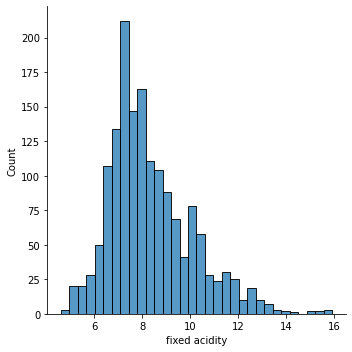

In [8]:
sns.displot(df['fixed acidity']);

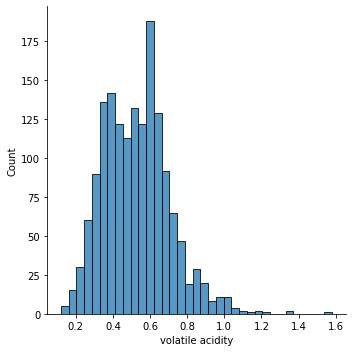

In [9]:
sns.displot(df['volatile acidity']);

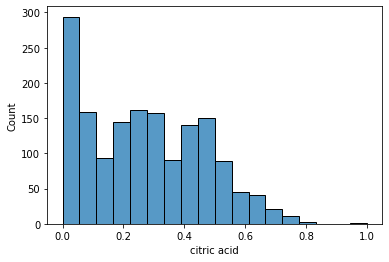

In [10]:
sns.histplot(df['citric acid']);

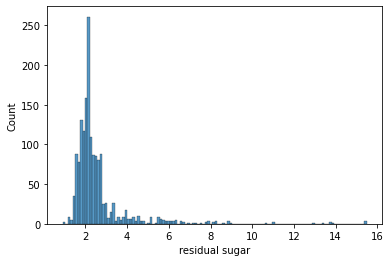

In [11]:
sns.histplot(df['residual sugar']);

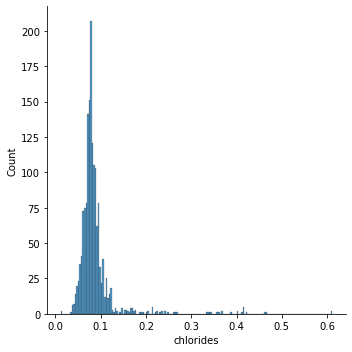

In [14]:
sns.displot(df['chlorides']);

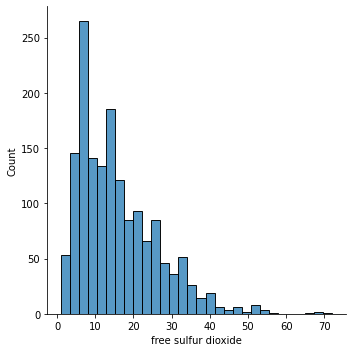

In [15]:
sns.displot(df['free sulfur dioxide']);

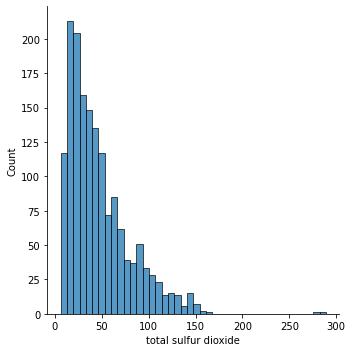

In [16]:
sns.displot(df['total sulfur dioxide']);

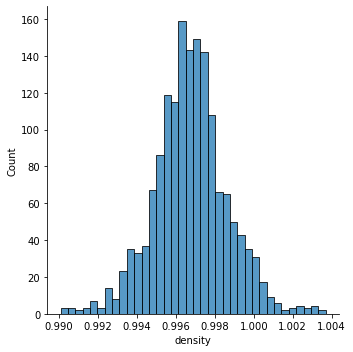

In [17]:
sns.displot(df['density'])

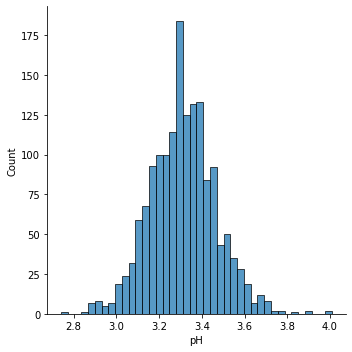

In [18]:
sns.displot(df['pH'])

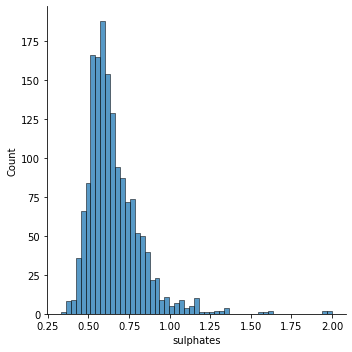

In [19]:
sns.displot(df['sulphates'])

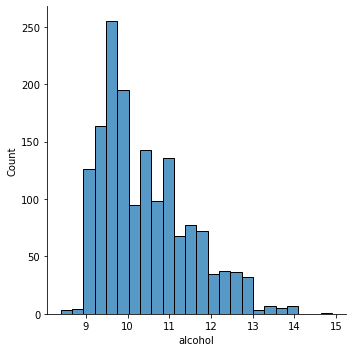

In [20]:
sns.displot(df['alcohol']);

In [21]:
df['quality'].value_counts()

good    855
bad     744
Name: quality, dtype: int64

### the dataset is balanced

In [22]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


### we see again info about the distribution (above) and correlations of the variables (below)

In [23]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


### then a heatmap to visualize the correlations. nothing above 0.7

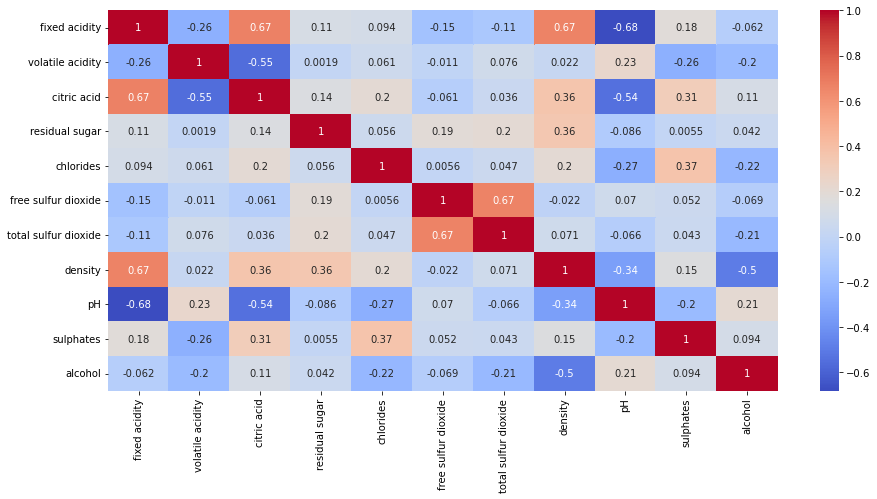

In [24]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm");

In [25]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [28]:
import seaborn as sns

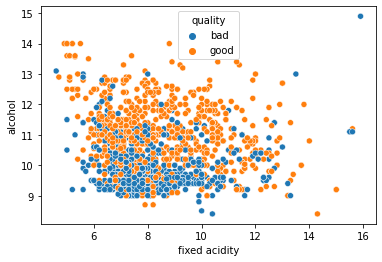

In [27]:
sns.scatterplot(data=df,x=df['fixed acidity'],y=df['alcohol'],hue=df['quality'])

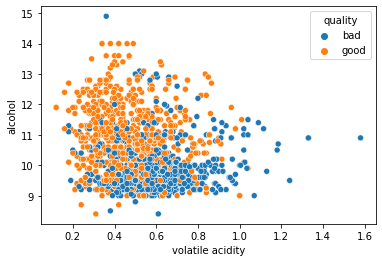

In [28]:
sns.scatterplot(data=df,x=df['volatile acidity'],y=df['alcohol'],hue=df['quality'])

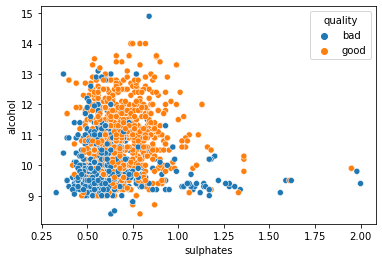

In [29]:
sns.scatterplot(data=df,x=df['sulphates'],y=df['alcohol'],hue=df['quality'])

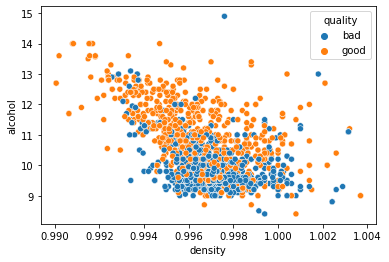

In [30]:
sns.scatterplot(data=df,x=df['density'],y=df['alcohol'],hue=df['quality'])

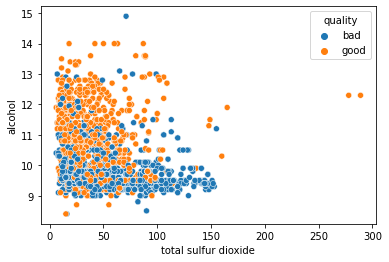

In [32]:
sns.scatterplot(data=df,x=df['total sulfur dioxide'],y=df['alcohol'],hue=df['quality'])

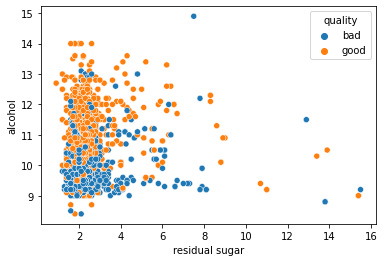

In [33]:
sns.scatterplot(data=df,x=df['residual sugar'],y=df['alcohol'],hue=df['quality'])

### charts above show the importance of alcohol to quality...

In [34]:
df['residual sugar1'] = np.log(df['residual sugar'] + 1)

### what we do then is transforming to log scale res.sugar and chlorides to make them look more normal

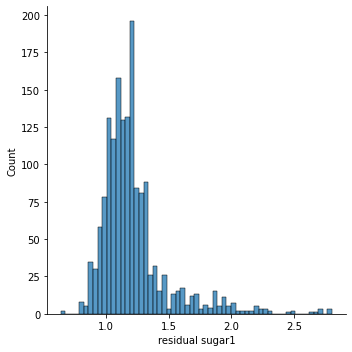

In [35]:
sns.displot(df['residual sugar1']);

In [36]:
df['chlorides1'] = np.log(df['chlorides'] + 1)

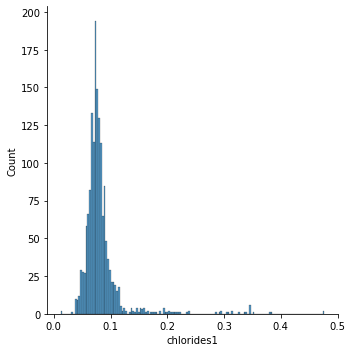

In [37]:
sns.displot(df['chlorides1']);

In [38]:
df_new=df.drop(['free sulfur dioxide'], axis=1, inplace=True)

In [39]:
df_new=df.drop(['chlorides1'], axis=1, inplace=True)

In [40]:
df_new=df.drop(['residual sugar'], axis=1, inplace=True)

In [41]:
df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality,residual sugar1
0,7.4,0.70,0.00,0.076,34.0,0.9978,3.51,0.56,9.4,bad,1.064711
1,7.8,0.88,0.00,0.098,67.0,0.9968,3.20,0.68,9.8,bad,1.280934
2,7.8,0.76,0.04,0.092,54.0,0.9970,3.26,0.65,9.8,bad,1.193922
3,11.2,0.28,0.56,0.075,60.0,0.9980,3.16,0.58,9.8,good,1.064711
4,7.4,0.70,0.00,0.076,34.0,0.9978,3.51,0.56,9.4,bad,1.064711


In [ ]:
import numpy as np
import pandas as pd
import lightgbm as lgb
pd.options.display.max_columns = 150
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler, PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import f1_score
from joblib import dump, load

### then we go on to classification modelling

In [43]:
df['quality']=df['quality'].replace('good',1)

In [48]:
df['quality']=df['quality'].replace('bad',0)

In [49]:
df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality,residual sugar1
0,7.4,0.70,0.00,0.076,34.0,0.9978,3.51,0.56,9.4,0,1.064711
1,7.8,0.88,0.00,0.098,67.0,0.9968,3.20,0.68,9.8,0,1.280934
2,7.8,0.76,0.04,0.092,54.0,0.9970,3.26,0.65,9.8,0,1.193922
3,11.2,0.28,0.56,0.075,60.0,0.9980,3.16,0.58,9.8,1,1.064711
4,7.4,0.70,0.00,0.076,34.0,0.9978,3.51,0.56,9.4,0,1.064711


In [50]:
X=df.drop(columns=['quality'])
y=df['quality']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

### SVC first...with parametre grid and tuning

In [53]:
svc=SVC()

In [54]:
param_grid = {'C': [1, 10,100], 'gamma': [1,0.1,0.001],'kernel': ['rbf', 'sigmoid']}

In [55]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)  

In [56]:
pipe01=Pipeline([('scaler', StandardScaler()), ('classifier', grid)])

In [57]:
pipe01.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.786 total time=   0.0s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.741 total time=   0.0s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.732 total time=   0.0s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.719 total time=   0.0s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.767 total time=   0.0s
[CV 1/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.545 total time=   0.0s
[CV 2/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.545 total time=   0.0s
[CV 3/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.585 total time=   0.0s
[CV 4/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.536 total time=   0.0s
[CV 5/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.574 total time=   0.0s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.768 total time=   0.0s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 GridSearchCV(estimator=SVC(),
                              param_grid={'C': [1, 10, 100],
                                          'gamma': [1, 0.1, 0.001],
                                          'kernel': ['rbf', 'sigmoid']},
                              verbose=3))])

In [58]:
pipe01.score(X_test,y_test)

0.7916666666666666

In [59]:
pred01 = pipe01.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [61]:
confusion_matrix(y_test,pred01)

array([[174,  47],
       [ 53, 206]], dtype=int64)

In [62]:
print(classification_report(y_test,pred01))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       221
           1       0.81      0.80      0.80       259

    accuracy                           0.79       480
   macro avg       0.79      0.79      0.79       480
weighted avg       0.79      0.79      0.79       480



### the score is 0.8 and below the best parameters...

In [63]:
print ('Best Parameters: ', grid.best_params_, ' \n')

Best Parameters:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}  



### then we introduce the extra tree classifier for explanation of classification

In [64]:
from sklearn.ensemble import ExtraTreesClassifier

In [65]:
model=ExtraTreesClassifier()

In [66]:
model.fit(X_train,y_train)

ExtraTreesClassifier()

In [67]:
importances = model.feature_importances_

### where again feature scores coincide with the correlagram...

In [68]:
feature_scores = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(20)

feature_scores

alcohol                 0.191361
sulphates               0.121894
volatile acidity        0.114483
total sulfur dioxide    0.113816
density                 0.085103
fixed acidity           0.081251
citric acid             0.078181
chlorides               0.074748
pH                      0.069653
residual sugar1         0.069510
dtype: float64

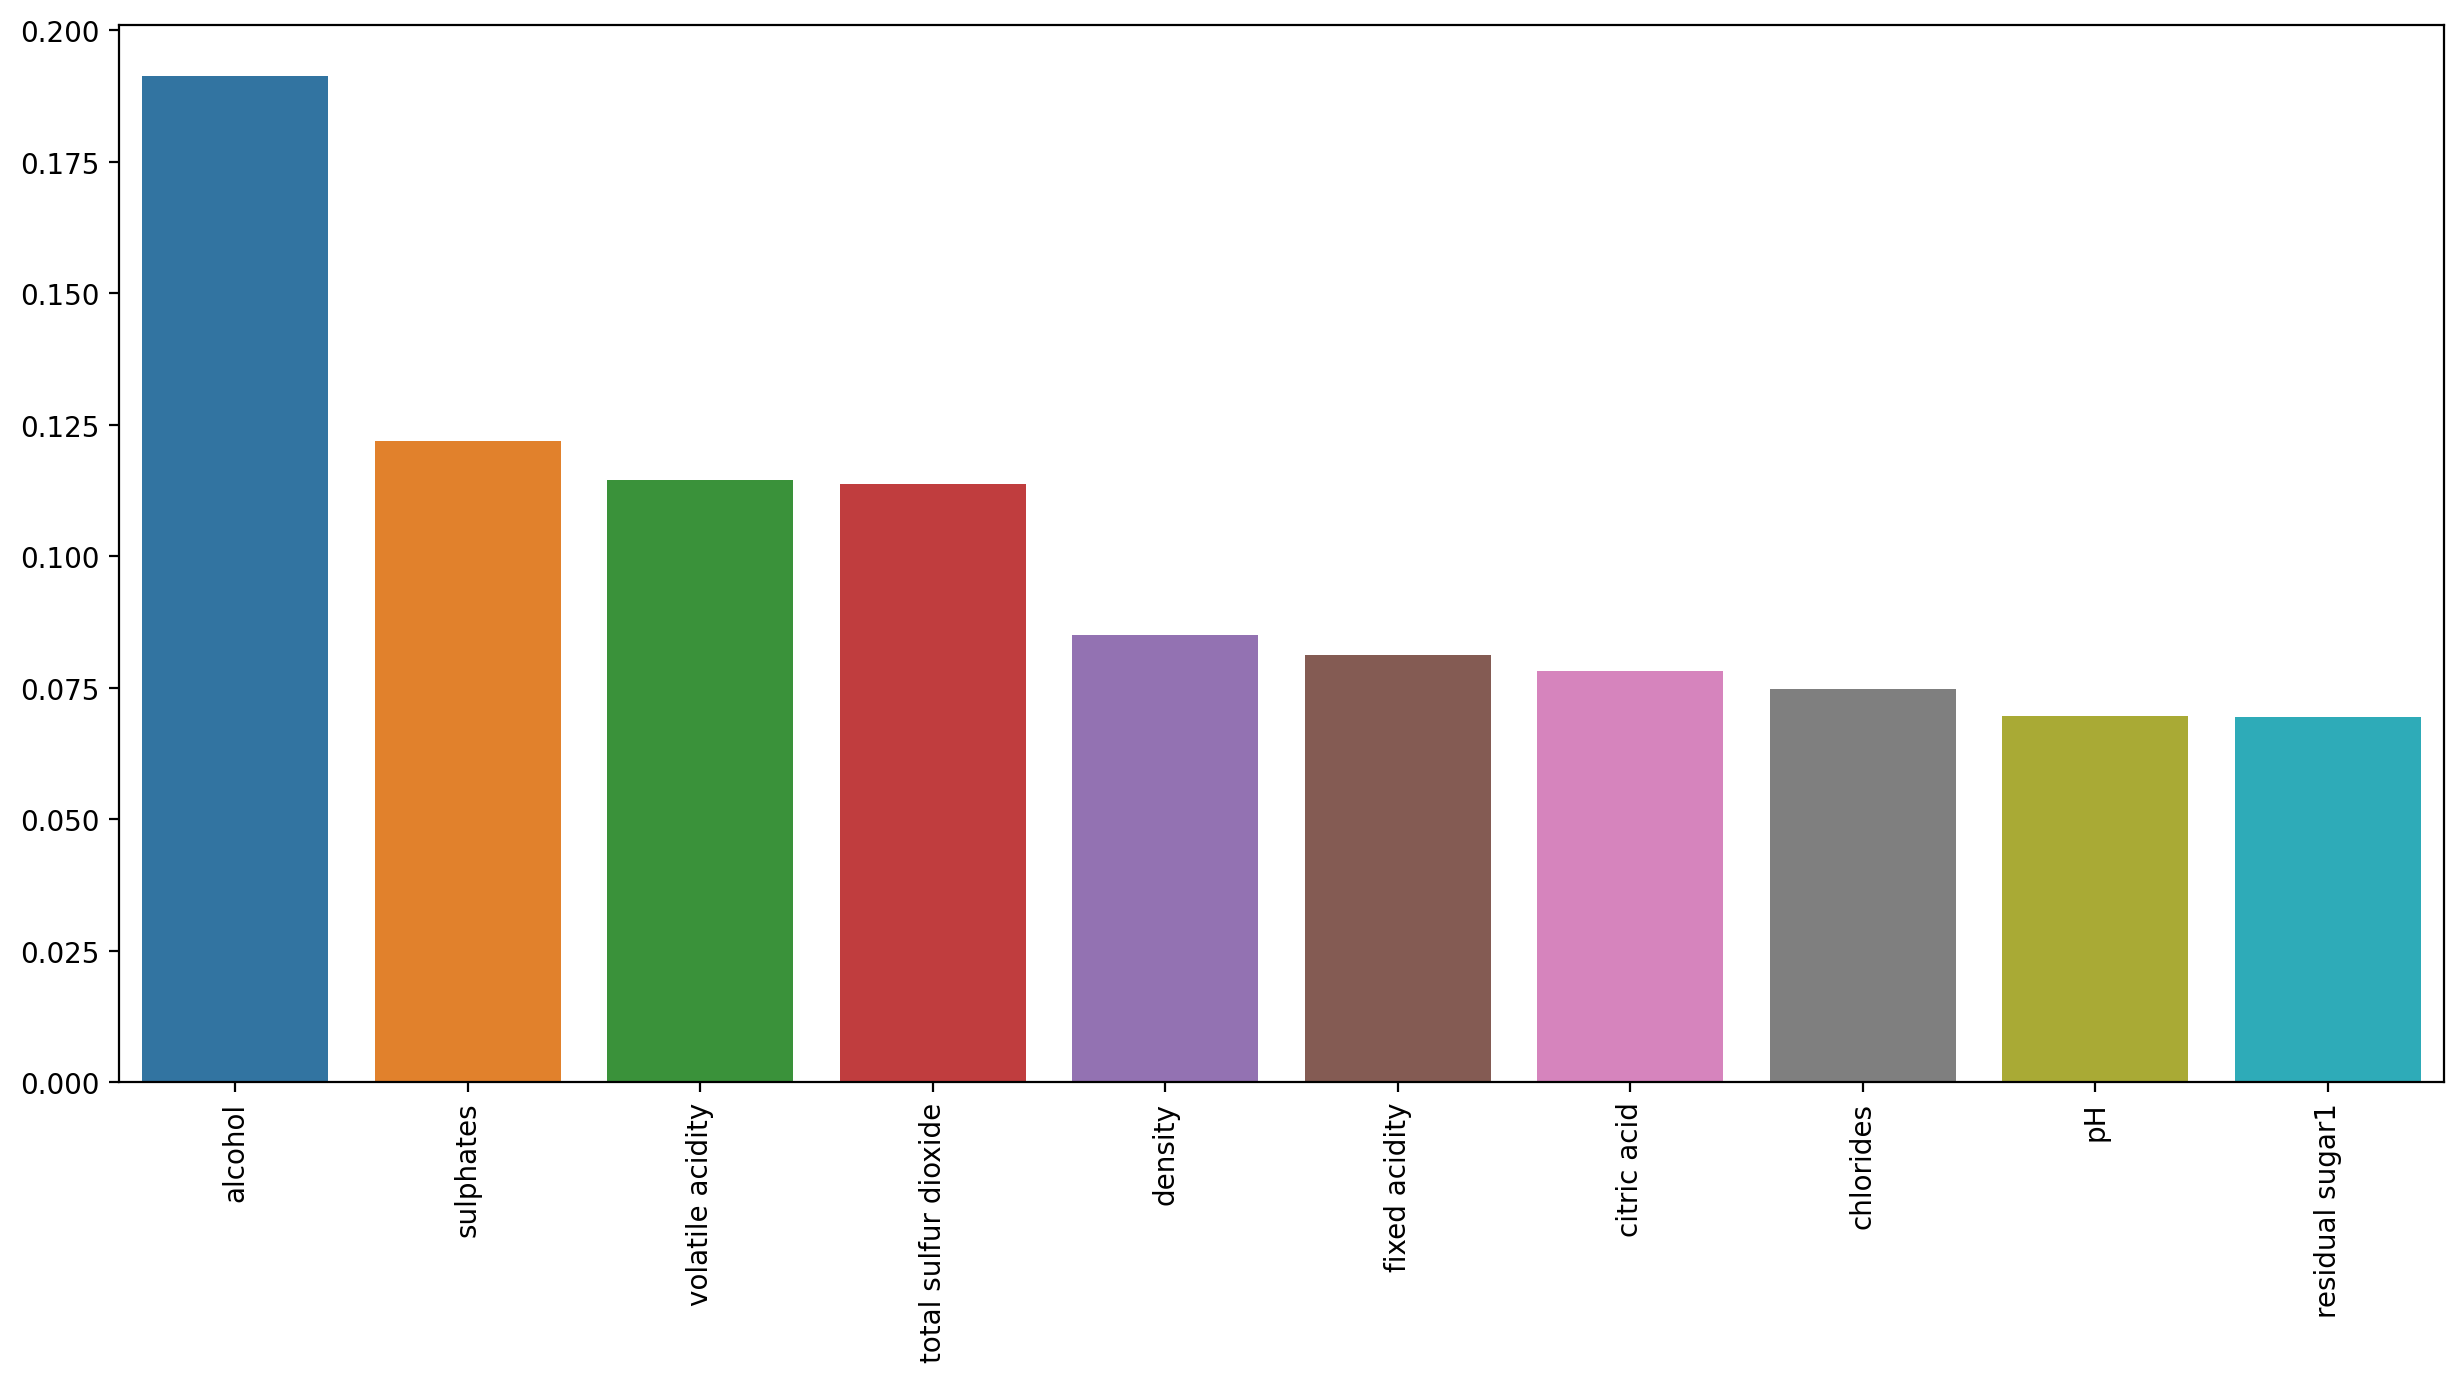

In [69]:
plt.figure(figsize=(15,7),dpi=200)
sns.barplot(x=feature_scores.index,y=feature_scores)
plt.xticks(rotation=90);

In [70]:
rf=RandomForestClassifier(n_estimators=100)

In [71]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [72]:
rf_pred=rf.predict(X_test)

In [73]:
import shap

In [74]:
shap_values = shap.TreeExplainer(rf).shap_values(X_train, approximate=True)

In [75]:
shap_df = pd.DataFrame(shap_values[1])

### the same outcome with shap

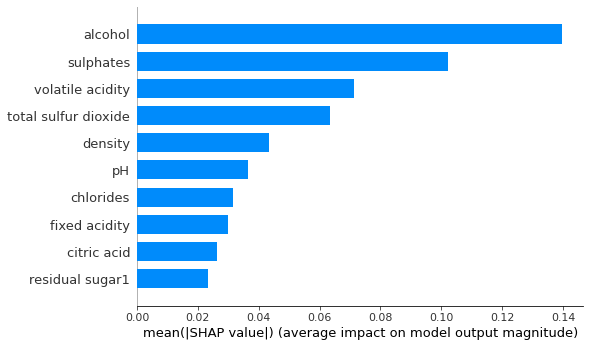

In [76]:
shap.summary_plot(shap_df, X_train, plot_type="bar")

 99%|===================| 2226/2238 [00:41<00:00]        

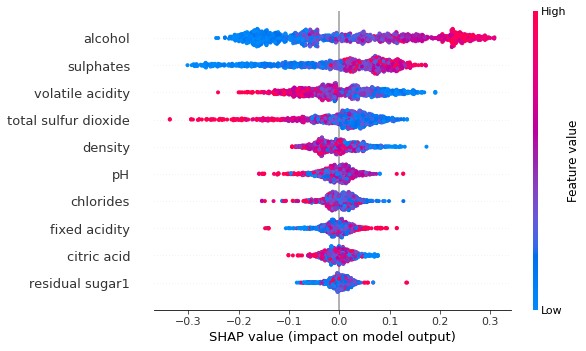

In [77]:
explainer = shap.TreeExplainer(rf, X_train)
shap_values_rf = explainer(X_train, check_additivity = False)
shap_values_rf_pos = shap_values_rf[...,1]
shap.plots.beeswarm(shap_values_rf_pos, max_display = None)

### finally the shap explainer shows us alcohol has the most positive impact in quality, then sulphates, while volatile acidity and total sulfur dioxide seem to have a negagtive impact. the rest have much less effect

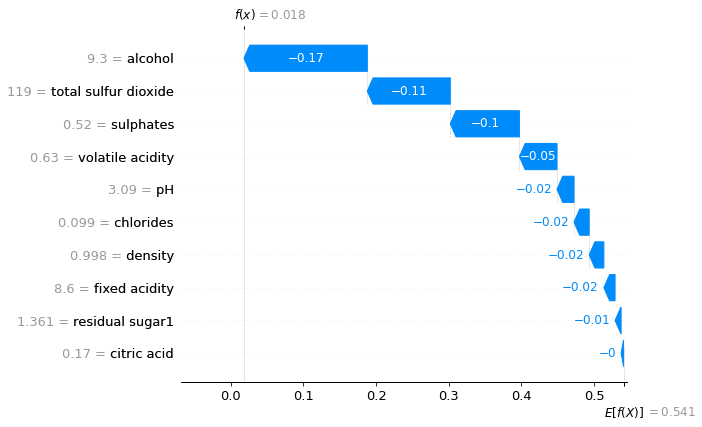

In [78]:
shap.plots.waterfall(shap_values_rf_pos[3], max_display=15)

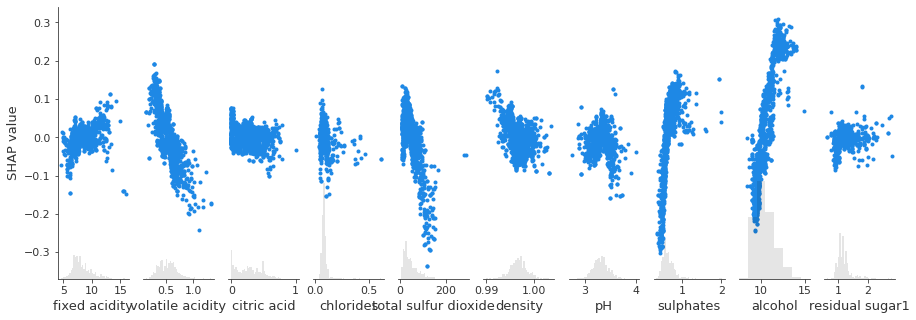

In [79]:
shap.plots.scatter(shap_values_rf_pos,['fixed acidity'])